In [7]:
import pandas as pd
df = pd.read_csv('Age_and_Disease-specific Survival.csv')
s=['age', 'survival']

In [8]:
from lifelines.fitters.coxph_fitter import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from lifelines import KaplanMeierFitter

<Axes: xlabel='timeline'>

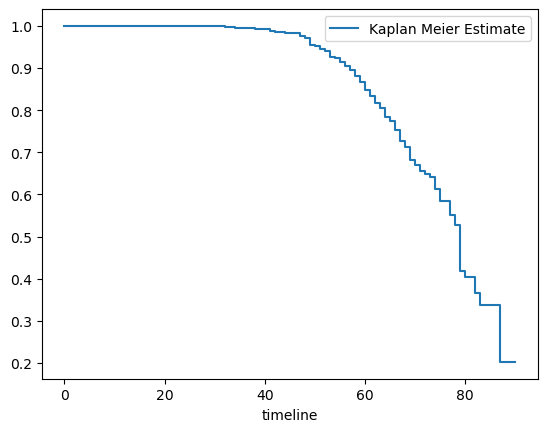

In [10]:
T = df.age
E = df.survival

## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(T, E,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

In [13]:
# Create Model
cph = CoxPHFitter()

# Fit the data to train the model
cph.fit(df, 'age', event_col='survival')

# Have a look at the significance of the features
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 497 total observations, 369 right-censored observations>
             duration col = 'age'
                event col = 'survival'
      baseline estimation = breslow
   number of observations = 497
number of events observed = 128
   partial log-likelihood = -661.59
         time fit was run = 2023-11-20 12:10:32 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 1323.18
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

<Axes: xlabel='log(HR) (95% CI)'>

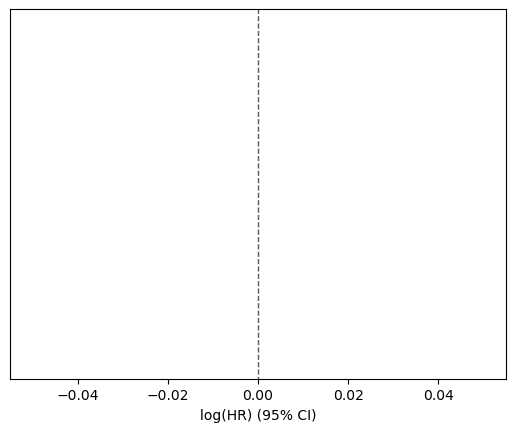

In [14]:
cph.plot()

In [23]:
## I want to see the Survival curve at the patient level.
## Random patients
patients = [4,13,211]

rows_selected = df.iloc[patients, 1:3]
rows_selected

,survival
4,1
13,1
211,0


<Axes: >

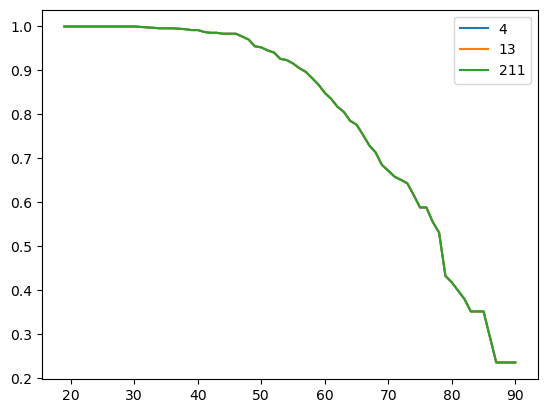

In [24]:
## Lets predict the survival curve for the selected patients. 
## Patients can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(rows_selected).plot()

In [65]:
#https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

In [3]:
import pandas as pd
df = pd.read_csv('TCGA-clinical-info.csv')
df.head()

,DiagnosisAge,Neoplasmstage,AneuploidyScore,Buffahypoxia Score,Monthsdiseasespecificsurvival,DiseasespecificSurvivalstatus,NeoplasmHistologicGrade,MutationCount,overallSurvival,OverallsurvivalStatus,CancerMetastasisStageCode,LymphNodeStage,CancerTumorStageCode,ProgressFreeSurvivalMonths,Radiationtherapy,RagnumHypoxiaScore,Sex,TMB,WinterHypoxiaScore
0,66.0,4.0,6.0,37.0,3.353388,0.0,2.0,111.0,3.353388,0,NaN,2.0,2.0,3.353388,0.0,12.0,1,3.700000,68.0
1,69.0,4.0,14.0,45.0,15.188875,1.0,3.0,128.0,15.188875,1,0.0,2.0,2.0,13.019035,1.0,20.0,1,4.233333,76.0
2,39.0,NaN,9.0,45.0,13.643686,1.0,2.0,295.0,13.643686,1,NaN,NaN,NaN,9.402637,1.0,20.0,1,9.833333,78.0
3,83.0,NaN,16.0,1.0,9.073873,1.0,2.0,380.0,9.073873,1,NaN,NaN,NaN,9.073873,1.0,12.0,1,12.800000,24.0
4,47.0,4.0,16.0,43.0,26.498340,1.0,2.0,108.0,26.498340,1,NaN,2.0,3.0,12.788901,1.0,18.0,1,3.666667,78.0


In [4]:
features=['DiagnosisAge', 'Neoplasmstage','AneuploidyScore','Buffahypoxia',
  'Monthsdiseasespecificsurvival','DiseasespecificSurvivalstatus','NeoplasmHistologicGrade','MutationCount',
   'overallSurvival','OverallsurvivalStatus','CancerMetastasisStageCode','LymphNodeStage','CancerTumorStageCode','ProgressFreeSurvivalMonths',
         'Radiationtherapy','RagnumHypoxiaScore','Sex','TMB','WinterHypoxiaScore']

In [4]:
from lifelines import CoxPHFitter


df.isnull().sum()



DiagnosisAge                       1
Neoplasmstage                     70
AneuploidyScore                   13
Buffahypoxia Score                 8
Monthsdiseasespecificsurvival      1
DiseasespecificSurvivalstatus     25
NeoplasmHistologicGrade           22
MutationCount                     21
overallSurvival                    1
OverallsurvivalStatus              0
CancerMetastasisStageCode        334
LymphNodeStage                    99
CancerTumorStageCode              62
ProgressFreeSurvivalMonths         1
Radiationtherapy                  67
RagnumHypoxiaScore                 8
Sex                                0
TMB                                8
WinterHypoxiaScore                 8
dtype: int64

# Fill the null values

In [5]:
df2=df.fillna(value=0)

In [6]:
df2.isnull().sum()

DiagnosisAge                     0
Neoplasmstage                    0
AneuploidyScore                  0
Buffahypoxia Score               0
Monthsdiseasespecificsurvival    0
DiseasespecificSurvivalstatus    0
NeoplasmHistologicGrade          0
MutationCount                    0
overallSurvival                  0
OverallsurvivalStatus            0
CancerMetastasisStageCode        0
LymphNodeStage                   0
CancerTumorStageCode             0
ProgressFreeSurvivalMonths       0
Radiationtherapy                 0
RagnumHypoxiaScore               0
Sex                              0
TMB                              0
WinterHypoxiaScore               0
dtype: int64

In [7]:
new_df=df2.drop(labels=[ 'ProgressFreeSurvivalMonths',  'DiseasespecificSurvivalstatus',              
                   
                 
              
'Monthsdiseasespecificsurvival','CancerMetastasisStageCode' ], axis=1)
new_df.head()

,DiagnosisAge,Neoplasmstage,AneuploidyScore,Buffahypoxia Score,NeoplasmHistologicGrade,MutationCount,overallSurvival,OverallsurvivalStatus,LymphNodeStage,CancerTumorStageCode,Radiationtherapy,RagnumHypoxiaScore,Sex,TMB,WinterHypoxiaScore
0,66.0,4.0,6.0,37.0,2.0,111.0,3.353388,0,2.0,2.0,0.0,12.0,1,3.700000,68.0
1,69.0,4.0,14.0,45.0,3.0,128.0,15.188875,1,2.0,2.0,1.0,20.0,1,4.233333,76.0
2,39.0,0.0,9.0,45.0,2.0,295.0,13.643686,1,0.0,0.0,1.0,20.0,1,9.833333,78.0
3,83.0,0.0,16.0,1.0,2.0,380.0,9.073873,1,0.0,0.0,1.0,12.0,1,12.800000,24.0
4,47.0,4.0,16.0,43.0,2.0,108.0,26.498340,1,2.0,3.0,1.0,18.0,1,3.666667,78.0


In [11]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi


cph = CoxPHFitter()
cph.fit(new_df, duration_col='overallSurvival', event_col='OverallsurvivalStatus')
cph.print_summary()  # access the individual results using cph.summary

<lifelines.CoxPHFitter: fitted with 523 total observations, 304 right-censored observations>
             duration col = 'overallSurvival'
                event col = 'OverallsurvivalStatus'
      baseline estimation = breslow
   number of observations = 523
number of events observed = 219
   partial log-likelihood = -1162.64
         time fit was run = 2023-11-23 10:01:31 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
DiagnosisAge              0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
Neoplasmstage            -0.22       0.81       0.10            -0.41            -0.02                 0.66                 0.98
AneuploidyScore           0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Buffahypoxia Score        0.02       1.02       0.01            -0.00             0.05                 1.00                 1.05
NeoplasmHistologicGrade   0.06       1.06       0.09            -0.13             0.24                 0.88                 1.28
MutationCount            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
LymphNodeStage            0.36       1.43       0.08             0.19             0.52                 1.21                 1.69
CancerTumorStageCode      0.20       1.23       0.09             0.02             0.39                 1.02                 1.47
Radiationtherapy         -0.68       0.51       0.15            -0.97            -0.40                 0.38                 0.67
RagnumHypoxiaScore       -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Sex                      -0.19       0.83       0.15            -0.49             0.11                 0.61                 1.12
TMB                       0.05       1.06       0.03            -0.01             0.12                 0.99                 1.12
WinterHypoxiaScore        0.00       1.00       0.01            -0.02             0.02                 0.99                 1.02

                          cmp to     z      p   -log2(p)
covariate                                               
DiagnosisAge                0.00  1.84   0.07       3.91
Neoplasmstage               0.00 -2.15   0.03       4.99
AneuploidyScore             0.00  0.19   0.85       0.24
Buffahypoxia Score          0.00  1.77   0.08       3.70
NeoplasmHistologicGrade     0.00  0.62   0.54       0.90
MutationCount               0.00 -1.58   0.12       3.12
LymphNodeStage              0.00  4.26 <0.005      15.61
CancerTumorStageCode        0.00  2.16   0.03       5.01
Radiationtherapy            0.00 -4.68 <0.005      18.40
RagnumHypoxiaScore          0.00 -0.13   0.89       0.16
Sex                         0.00 -1.23   0.22       2.20
TMB                         0.00  1.73   0.08       3.59
WinterHypoxiaScore          0.00  0.16   0.87       0.20
---
Concordance = 0.69
Partial AIC = 2351.27
log-likelihood ratio test = 80.84 on 13 df
-log2(p) of ll-ratio test = 36.93

<Axes: xlabel='log(HR) (95% CI)'>

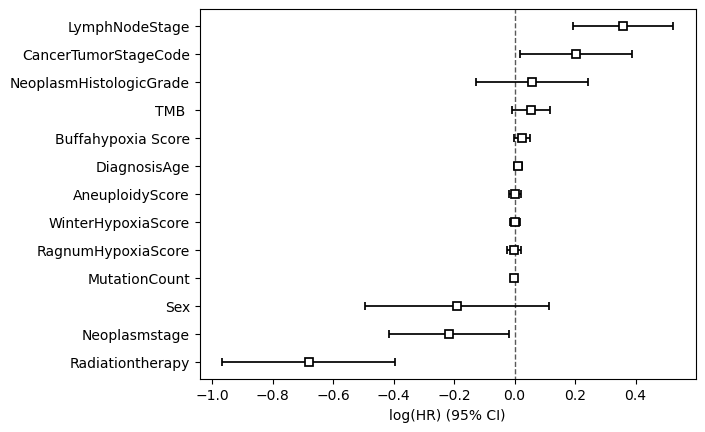

In [12]:
cph.plot()

In [14]:
X = new_df

cph.predict_survival_function(X)
cph.predict_median(X)
cph.predict_partial_hazard(X)

0      1.897880
1      1.291126
2      0.644899
3      0.374388
4      1.102908
         ...   
518    1.054051
519    4.141545
520    0.585445
521    1.876482
522    0.906836
Length: 523, dtype: float64

<Axes: >

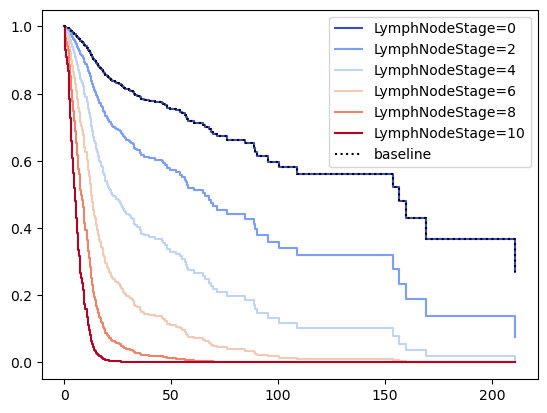

In [64]:
cph.plot_partial_effects_on_outcome(covariates='LymphNodeStage', values=[0, 2, 4, 6, 8, 10], cmap='coolwarm')

In [9]:
import kaplanmeier as km


In [62]:
time_event = new_df['overallSurvival']
censoring = new_df['LymphNodeStage']
y = new_df['OverallsurvivalStatus']
results = km.fit(time_event,censoring, y)


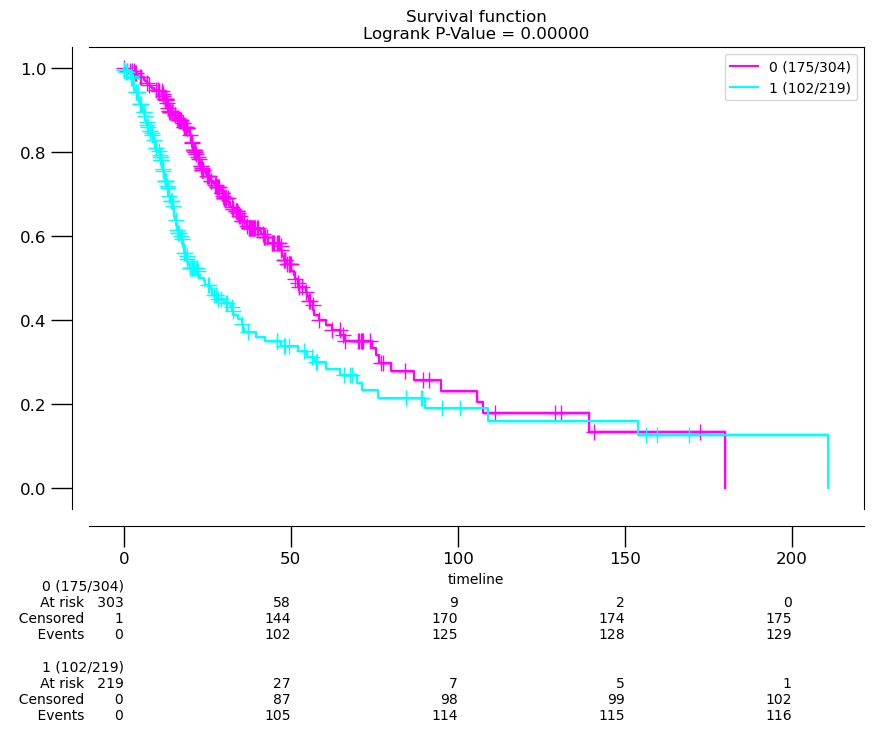

In [63]:
km.plot(results, cmap=[(1, 0, 1),(0, 1, 1)])

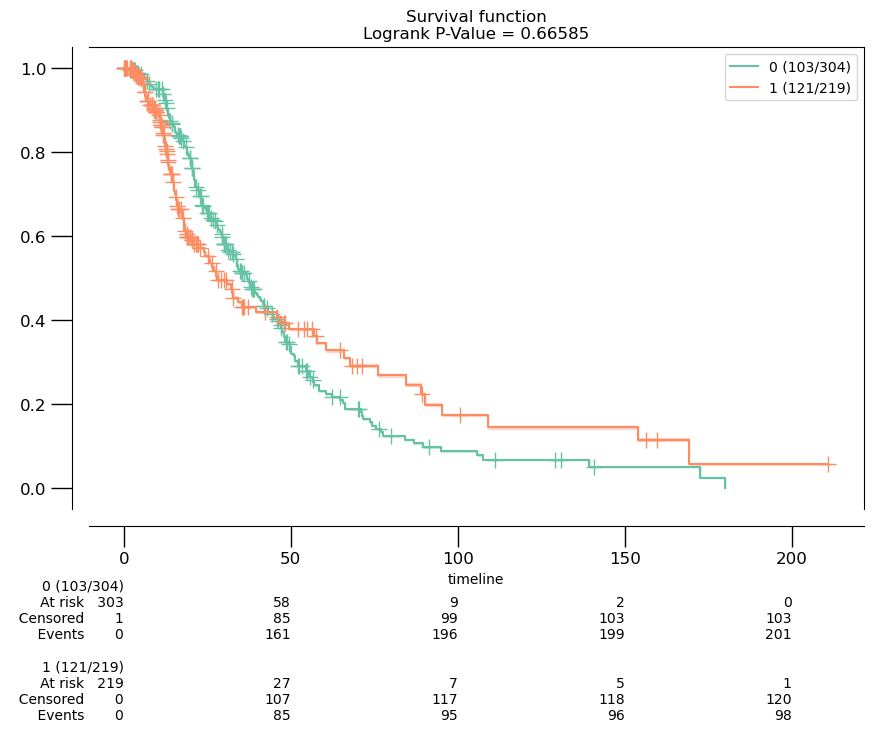

In [35]:
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt

time_event = new_df['overallSurvival']
censoring = new_df['Radiationtherapy']
y = new_df['OverallsurvivalStatus']
results = km.fit(time_event,censoring, y)


ax=km.plot(results, cmap='Set2')


#ax.set(title = title, xlabel = "x-axis", ylabel = "y-axis")

# Impoarartnat Features for survival

# Penalized Regression

# Penalties and sparse regression¶

In [61]:
from lifelines import CoxPHFitter
cph = CoxPHFitter(penalizer=0.002, l1_ratio=1.0) # sparse solutions,
cph.fit(new_df, duration_col='overallSurvival', event_col='OverallsurvivalStatus')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 523 total observations, 304 right-censored observations>
             duration col = 'overallSurvival'
                event col = 'OverallsurvivalStatus'
                penalizer = 0.002
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 523
number of events observed = 219
   partial log-likelihood = -1165.26
         time fit was run = 2023-11-22 22:45:35 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
DiagnosisAge              0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03
Neoplasmstage            -0.19       0.83       0.10            -0.38             0.01                 0.68                 1.01
AneuploidyScore           0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Buffahypoxia Score        0.02       1.02       0.01            -0.00             0.05                 1.00                 1.05
NeoplasmHistologicGrade   0.05       1.05       0.09            -0.13             0.24                 0.87                 1.27
MutationCount            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
LymphNodeStage            0.34       1.41       0.08             0.18             0.51                 1.20                 1.66
CancerTumorStageCode      0.19       1.20       0.09             0.00             0.37                 1.00                 1.44
Radiationtherapy         -0.68       0.51       0.15            -0.96            -0.40                 0.38                 0.67
RagnumHypoxiaScore       -0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
Sex                      -0.18       0.83       0.15            -0.49             0.12                 0.62                 1.13
TMB                       0.04       1.04       0.03            -0.02             0.10                 0.98                 1.11
WinterHypoxiaScore        0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02

                          cmp to     z      p   -log2(p)
covariate                                               
DiagnosisAge                0.00  1.81   0.07       3.83
Neoplasmstage               0.00 -1.89   0.06       4.10
AneuploidyScore             0.00  0.22   0.83       0.27
Buffahypoxia Score          0.00  1.70   0.09       3.48
NeoplasmHistologicGrade     0.00  0.54   0.59       0.77
MutationCount               0.00 -1.10   0.27       1.89
LymphNodeStage              0.00  4.09 <0.005      14.49
CancerTumorStageCode        0.00  1.99   0.05       4.42
Radiationtherapy            0.00 -4.68 <0.005      18.39
RagnumHypoxiaScore          0.00 -0.01   0.99       0.01
Sex                         0.00 -1.18   0.24       2.08
TMB                         0.00  1.23   0.22       2.19
WinterHypoxiaScore          0.00  0.20   0.84       0.25
---
Concordance = 0.69
Partial AIC = 2356.52
log-likelihood ratio test = 75.60 on 13 df
-log2(p) of ll-ratio test = 33.66

# 

# XGBoost

In [36]:
import matplotlib.pylab as pl
import xgboost
from sklearn.model_selection import train_test_split

import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [72]:
import pandas as pd
df = pd.read_csv('TCGA-clinical-info.csv')
df.head()

,DiagnosisAge,Neoplasmstage,AneuploidyScore,Buffahypoxia Score,Monthsdiseasespecificsurvival,DiseasespecificSurvivalstatus,NeoplasmHistologicGrade,MutationCount,overallSurvival,OverallsurvivalStatus,CancerMetastasisStageCode,LymphNodeStage,CancerTumorStageCode,ProgressFreeSurvivalMonths,Radiationtherapy,RagnumHypoxiaScore,Sex,TMB,WinterHypoxiaScore
0,66.0,4.0,6.0,37.0,3.353388,0.0,2.0,111.0,3.353388,0,NaN,2.0,2.0,3.353388,0.0,12.0,1,3.700000,68.0
1,69.0,4.0,14.0,45.0,15.188875,1.0,3.0,128.0,15.188875,1,0.0,2.0,2.0,13.019035,1.0,20.0,1,4.233333,76.0
2,39.0,NaN,9.0,45.0,13.643686,1.0,2.0,295.0,13.643686,1,NaN,NaN,NaN,9.402637,1.0,20.0,1,9.833333,78.0
3,83.0,NaN,16.0,1.0,9.073873,1.0,2.0,380.0,9.073873,1,NaN,NaN,NaN,9.073873,1.0,12.0,1,12.800000,24.0
4,47.0,4.0,16.0,43.0,26.498340,1.0,2.0,108.0,26.498340,1,NaN,2.0,3.0,12.788901,1.0,18.0,1,3.666667,78.0


In [73]:
df.isnull().sum()
df=df.fillna(value=0)

In [74]:
Y=df['overallSurvival']
print(Y)
y=pd.DataFrame(Y)
l=y.to_numpy()

m=l.ravel()

m

0       3.353388
1      15.188875
2      13.643686
3       9.073873
4      26.498340
         ...    
518    32.646218
519     2.958872
520    17.029950
521    20.547720
522    14.564224
Name: overallSurvival, Length: 523, dtype: float64


array([3.35338791e+00, 1.51888746e+01, 1.36436861e+01, 9.07387316e+00,
       2.64983397e+01, 2.37367262e+01, 4.23447414e+01, 5.79281323e+01,
       1.70957031e+01, 2.38353552e+01, 2.04819673e+01, 6.55883223e+01,
       6.84814413e+01, 1.55176382e+01, 2.11723707e+01, 1.48272348e+01,
       3.55064602e+00, 1.26245192e+01, 4.01091495e+00, 4.18515961e+01,
       2.94243351e+01, 2.81092810e+01, 2.04490910e+01, 3.01804912e+01,
       2.79448992e+01, 1.15395996e+01, 7.10129204e+00, 5.68760890e+00,
       1.44655949e+01, 7.82457179e+00, 2.26846829e+00, 1.10464543e+01,
       1.33806753e+01, 2.04819673e+01, 1.64052997e+01, 6.14787783e+00,
       1.05894730e+02, 9.13962587e+00, 4.79994740e+00, 4.40543117e+00,
       1.83778808e+01, 2.24216721e+01, 3.67228852e+01, 3.36982608e+01,
       5.02021896e+01, 4.49748496e+01, 6.62787257e+01, 2.46572640e+01,
       3.83995792e+01, 7.10457968e+01, 2.05148437e+01, 2.57093073e+01,
       1.05533090e+01, 2.71887431e+01, 1.29204064e+01, 8.81086235e+00,
      

In [75]:
df=df.drop(labels=[ 'ProgressFreeSurvivalMonths',  'DiseasespecificSurvivalstatus','Monthsdiseasespecificsurvival','CancerMetastasisStageCode','overallSurvival','OverallsurvivalStatus' ], axis=1)
df.head()

,DiagnosisAge,Neoplasmstage,AneuploidyScore,Buffahypoxia Score,NeoplasmHistologicGrade,MutationCount,LymphNodeStage,CancerTumorStageCode,Radiationtherapy,RagnumHypoxiaScore,Sex,TMB,WinterHypoxiaScore
0,66.0,4.0,6.0,37.0,2.0,111.0,2.0,2.0,0.0,12.0,1,3.700000,68.0
1,69.0,4.0,14.0,45.0,3.0,128.0,2.0,2.0,1.0,20.0,1,4.233333,76.0
2,39.0,0.0,9.0,45.0,2.0,295.0,0.0,0.0,1.0,20.0,1,9.833333,78.0
3,83.0,0.0,16.0,1.0,2.0,380.0,0.0,0.0,1.0,12.0,1,12.800000,24.0
4,47.0,4.0,16.0,43.0,2.0,108.0,2.0,3.0,1.0,18.0,1,3.666667,78.0


In [76]:
xgb_full = xgboost.DMatrix(df, label=m)
xgb_full

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df, m, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)
y_train.shape

(418,)

In [78]:
# use validation set to choose # of trees
params = {"eta": 0.002, "max_depth": 3, "objective": "survival:cox", "subsample": 0.5}
model_train = xgboost.train(
    params, xgb_train, 10000, evals=[(xgb_test, "test")], verbose_eval=1000
)

[0]	test-cox-nloglik:3.68565
[999]	test-cox-nloglik:3.72836


In [85]:
#train final model on the full data set
params = {"eta": 0.002, "max_depth": 3, "objective": "survival:cox", "subsample": 0.5}
model = xgboost.train(
    params, xgb_full, 5000, evals=[(xgb_full, "test")], verbose_eval=1000
)

[0]	test-cox-nloglik:5.26575
[1000]	test-cox-nloglik:5.14385
[2000]	test-cox-nloglik:5.06701
[3000]	test-cox-nloglik:5.00433
[4000]	test-cox-nloglik:4.94877
[4999]	test-cox-nloglik:4.90137


In [81]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches / total


# see how well we can order people by survival
c_statistic_harrell(model_train.predict(xgb_test), y_test)

0.5205353868720205

In [82]:
shap_values = shap.TreeExplainer(model).shap_values(df)

[19:18:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


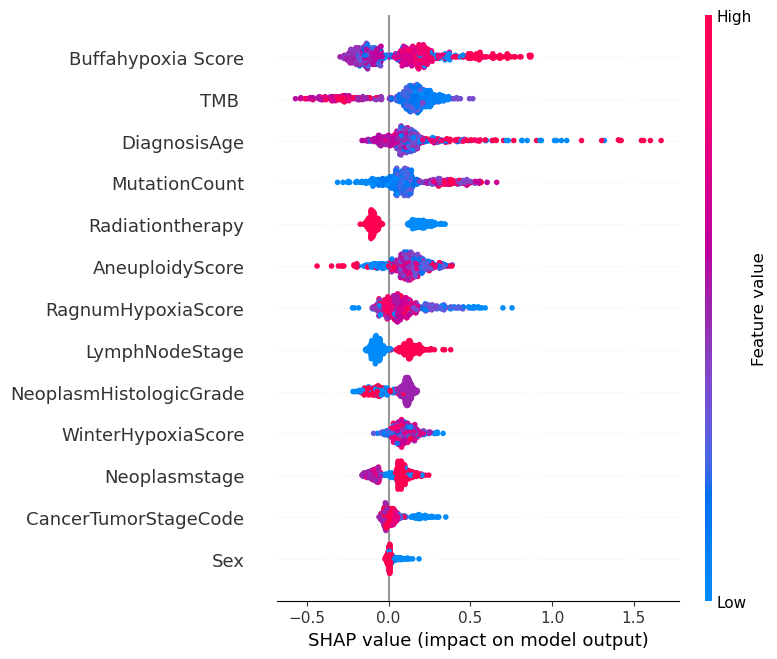

In [83]:
shap.summary_plot(shap_values, df)

In [88]:
shap_values = shap.TreeExplainer(model).shap_values(df)


[00:27:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


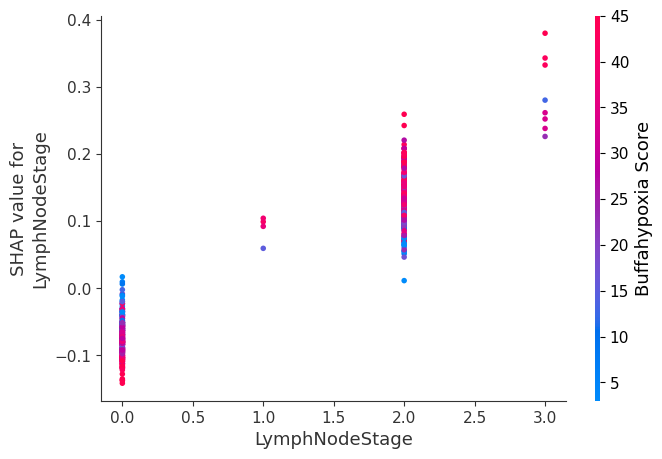

In [90]:
shap.dependence_plot("LymphNodeStage", shap_values, df)

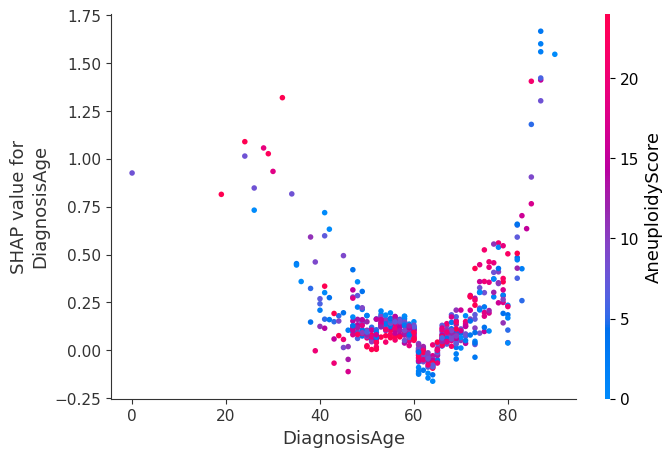

In [93]:
shap.dependence_plot("DiagnosisAge", shap_values, df)

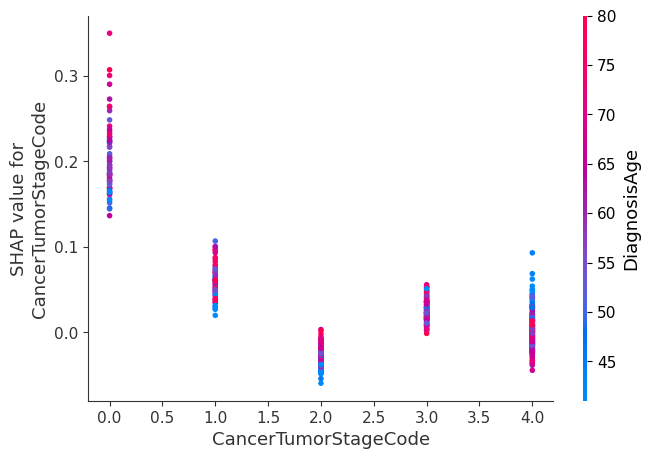

In [96]:
shap.dependence_plot("CancerTumorStageCode", shap_values, df)

[00:39:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


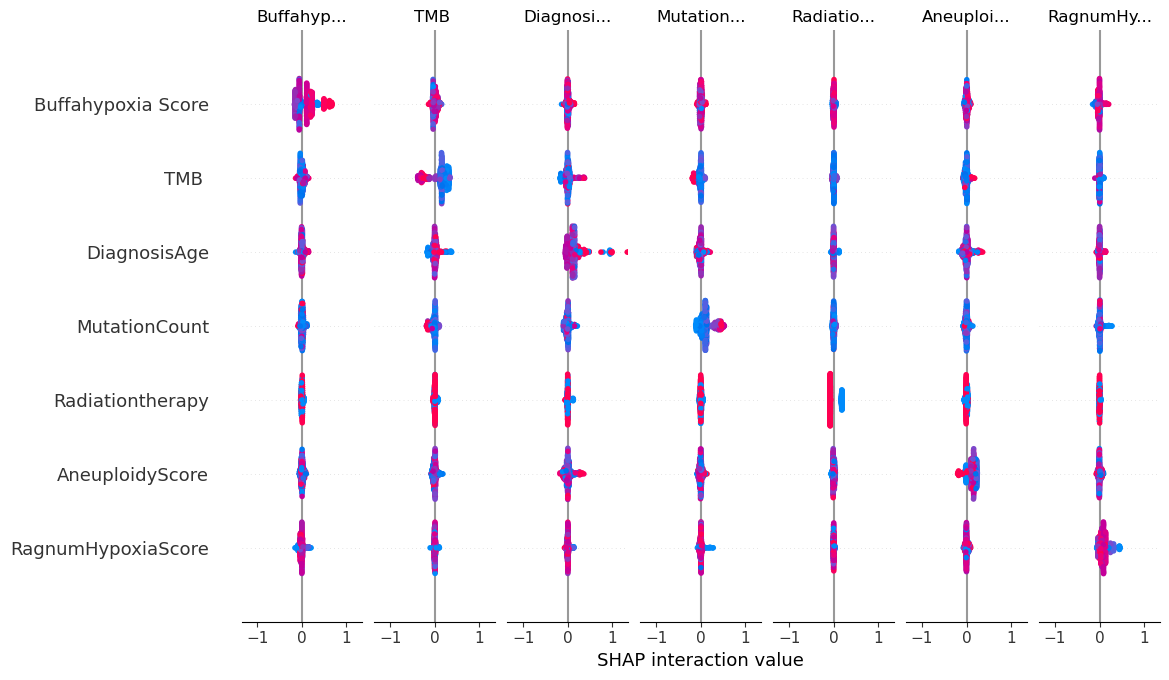

In [101]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(
    df.iloc[:2000, :])
shap.summary_plot(shap_interaction_values, df.iloc[:2000, :])


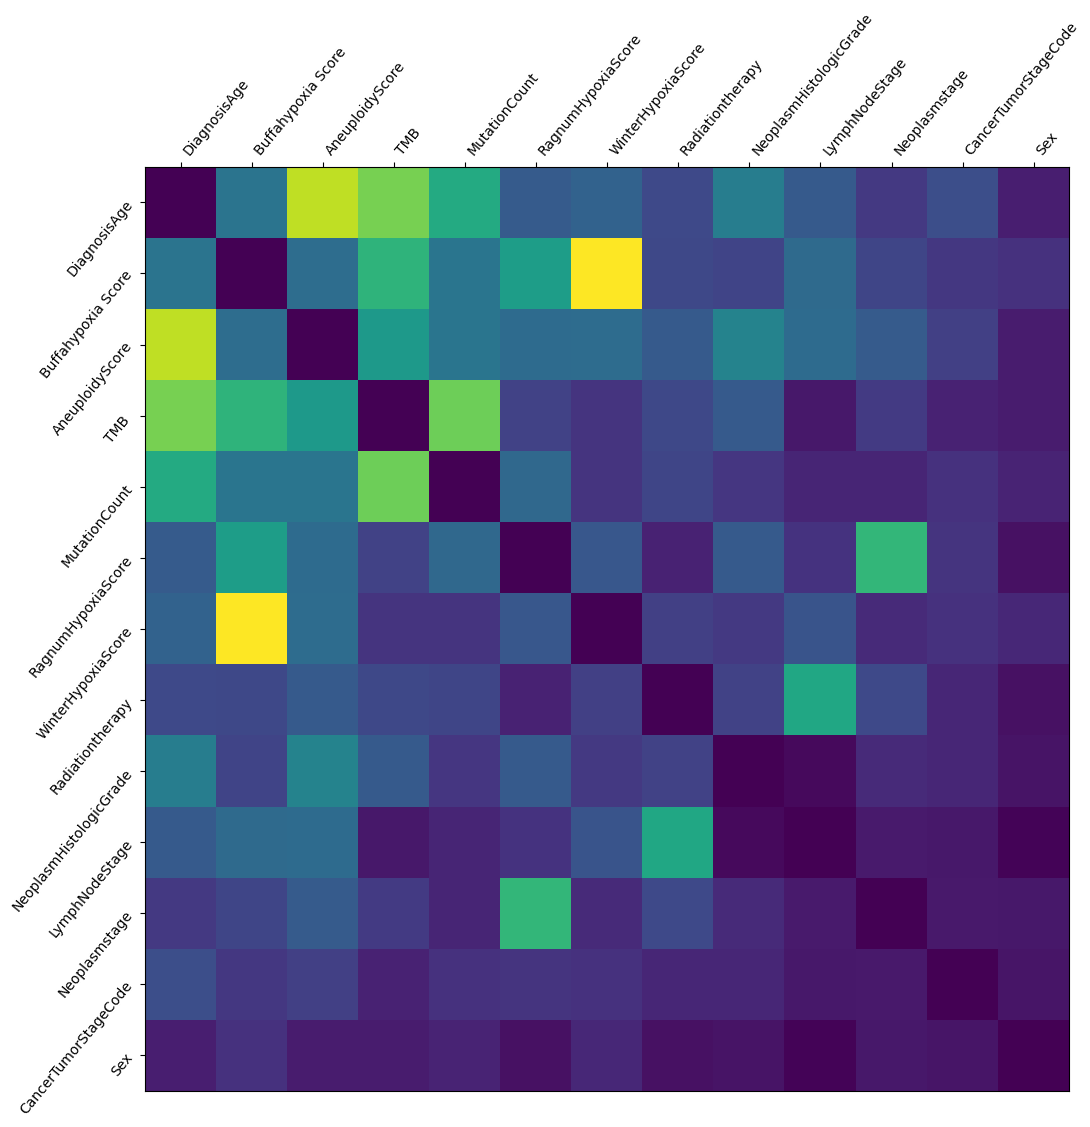

In [103]:
import matplotlib.pylab as pl
import numpy as np
tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i, i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds, :][:, inds]
pl.figure(figsize=(12, 12))
pl.imshow(tmp2)
pl.yticks(
    range(tmp2.shape[0]), df.columns[inds], rotation=50.4, horizontalalignment="right"
)
pl.xticks(
    range(tmp2.shape[0]), df.columns[inds], rotation=50.4, horizontalalignment="left"
)
pl.gca().xaxis.tick_top()
pl.show()